In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [98]:
from keras.datasets import mnist
(trainX, trainy), (testX, testy)= mnist.load_data()

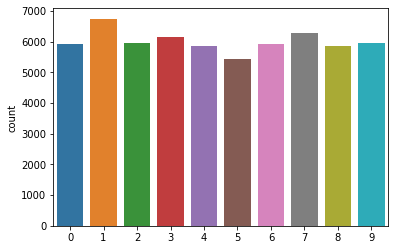

In [99]:
sns.countplot(trainy)

In [100]:
pd.Series(trainy).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [101]:
trainX = trainX/255.0
testX =testX/255.0

In [102]:
trainX= trainX.reshape(trainX.shape[0],28,28,1)
testX= testX.reshape(testX.shape[0],28,28,1)

In [103]:
trainy= to_categorical(trainy, num_classes=10)
testy= to_categorical(testy,num_classes=10)
trainX.shape

(60000, 28, 28, 1)

In [104]:
trainX, valX, trainy, valy= train_test_split(trainX,trainy,test_size=0.1,random_state=2)

In [106]:
valX.shape

(6000, 28, 28, 1)

In [107]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

In [108]:
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [109]:
optimizer= RMSprop(lr=0.001,rho=0.9)

In [110]:
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [111]:
learning_rate_reduction= ReduceLROnPlateau(monitor='val_acc',patience=3)

In [114]:
epochs=3
batch_size=86

In [115]:
history = model.fit(trainX, trainy, batch_size = batch_size, epochs = epochs, 
          validation_data = (valX, valy), verbose = 2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
 - 169s - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0249 - val_accuracy: 0.9930
Epoch 2/3
 - 168s - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0335 - val_accuracy: 0.9922
Epoch 3/3
 - 155s - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.0268 - val_accuracy: 0.9928


In [ ]:
datagen= ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
                           zca_whitening=False,
                            rotation_range=10,
                            samplewise_std_normalization=False,
                            zoom_range=0.1,
                            horizontal_flip=False,vertical_flip=False)

In [66]:
datagen.fit(trainX)